In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
# Configuration
DATA_PATH = 'C:/Users/USER/Documents/Portfolio stuff/Fintech_CLV_Churn_Analysis/data'
INPUT_MODEL_DATA = os.path.join(DATA_PATH, 'model_data.csv')
VIS_PATH = 'C:/Users/USER/Documents/Portfolio stuff/Fintech_CLV_Churn_Analysis/visualizations'
FEATURE_IMP_FILE = os.path.join(VIS_PATH, 'Feature_Importance_Chart.png')

In [3]:
df = pd.read_csv(INPUT_MODEL_DATA, index_col=0)


In [10]:
# Separate features (X) and target (y)
feature_cols = [
    'Total_Products', 
    'Total_Transactions', 
    'Usage_Diversity_Count' # Recency is now excluded
]

X = df[feature_cols]
y = df['Churn_Flag']

In [11]:
# Data splitting
# splitting again to ensure classifier is only trained on training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
    )

### Model training

In [12]:
# Model training
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Model evaluation

In [13]:
# Model evaluation
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.48      0.61     44290
           1       0.34      0.78      0.48     15283

    accuracy                           0.56     59573
   macro avg       0.60      0.63      0.54     59573
weighted avg       0.73      0.56      0.58     59573

ROC AUC Score: 0.6722


### Feature importance and extraction

In [16]:
# This directly answers the business question: "what drives churn?"

# Extract importance scores
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_29176\775597117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')


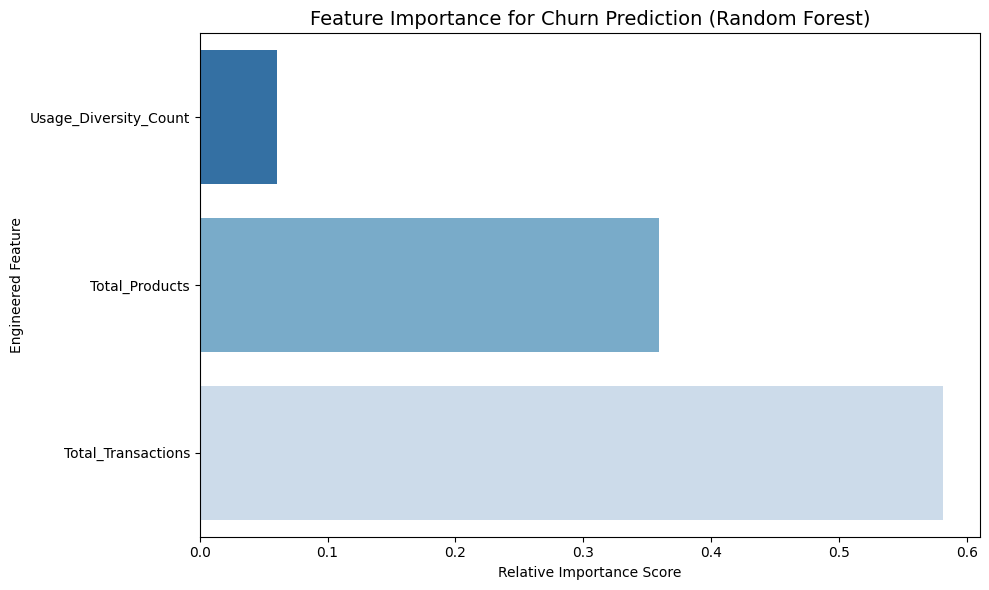

In [17]:
# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')
plt.title('Feature Importance for Churn Prediction (Random Forest)', fontsize=14)
plt.xlabel('Relative Importance Score')
plt.ylabel('Engineered Feature')
plt.tight_layout()

In [18]:
# Save the plot
plt.savefig(FEATURE_IMP_FILE)

<Figure size 640x480 with 0 Axes>

### Business Interpretation Summary

In [19]:
# Identify the most and least important features
top_feature = importance_df.iloc[-1]['Feature']
low_feature = importance_df.iloc[0]['Feature']

print(f"Most Important Driver: {top_feature}")
print(f"Least Important Driver: {low_feature}")

Most Important Driver: Total_Transactions
Least Important Driver: Usage_Diversity_Count
